1) Follow the tutorial found at https://sep.readthedocs.io/en/stable/tutorial.htmlLinks to an external site., but use the astropy fits routines instead of fitsio. Create a notebook that performs the tutorial and comment it using Markdown to explain what it’s doing. Note that the fits image used in the tutorial can be acquired via the sep GitHub account.

2) Augment the tutorial to save each of the four figures to PNG files.

3) Get the f105w band image of the Hubble Ultra Deep Field, which is called

hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits

You can download it from https://archive.stsci.edu/pub/hlsp/hudf12/Links to an external site..

4) Redo the tutorial steps in a second notebook, but on the UDF f105w image. How many sources do you find? Histogram their fluxes.

5) What are the mean, median, and standard deviation of the distribution of fluxes. What is the largest outlier in the distribution, where is it on the image, and how many standard deviations is it away from the mean? 

6) Download the f125w and f160w images of the HUDF at the same website, and make a 3-color false image of the UDF using RGB -> f160w, f125w, f105w. Save the image as a PNG.

In [1]:
# imports
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10, 8]

ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992                [astropy.io.fits.card]
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC       [astropy.io.fits.card]
ESO-LOG 03:04:09> EXPO EMMI RED NO = 24887     / Exp. num. on EMMI Red CCD       [astropy.io.fits.card]
ESO-LOG 03:10:52>-STOP EXPO EMMI RED           / Stop exp. on EMMI Red CCD       [astropy.io.fits.card]


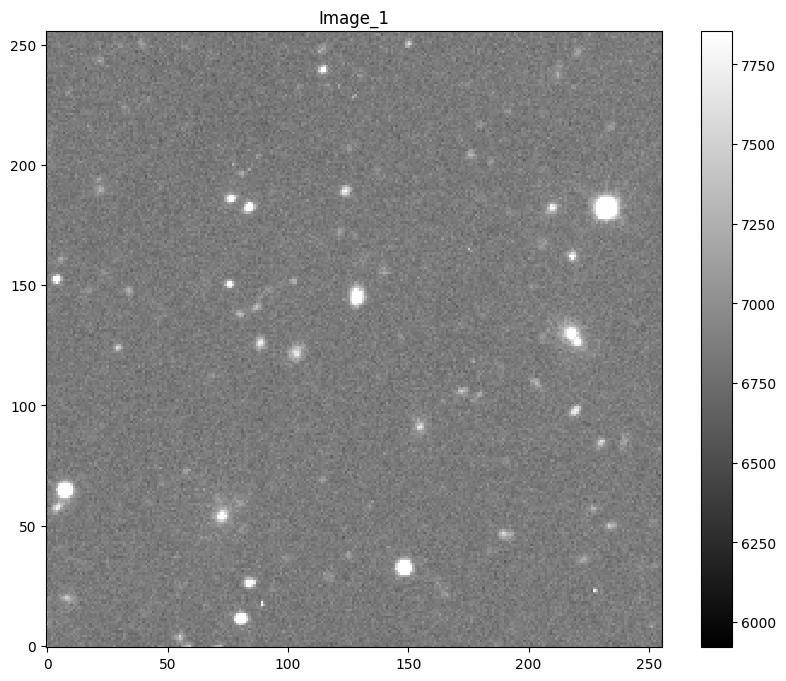

In [2]:
# read image with astropy
fdata = "image.fits"
hdu = fits.open(fdata)
data = hdu[0].data.astype(np.float32)

# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.title('Image_1')
plt.savefig('tutorial_image.png', dpi =150)
plt.show()

In [3]:
bkg = sep.Background(data)

In [4]:
# print bkg data
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


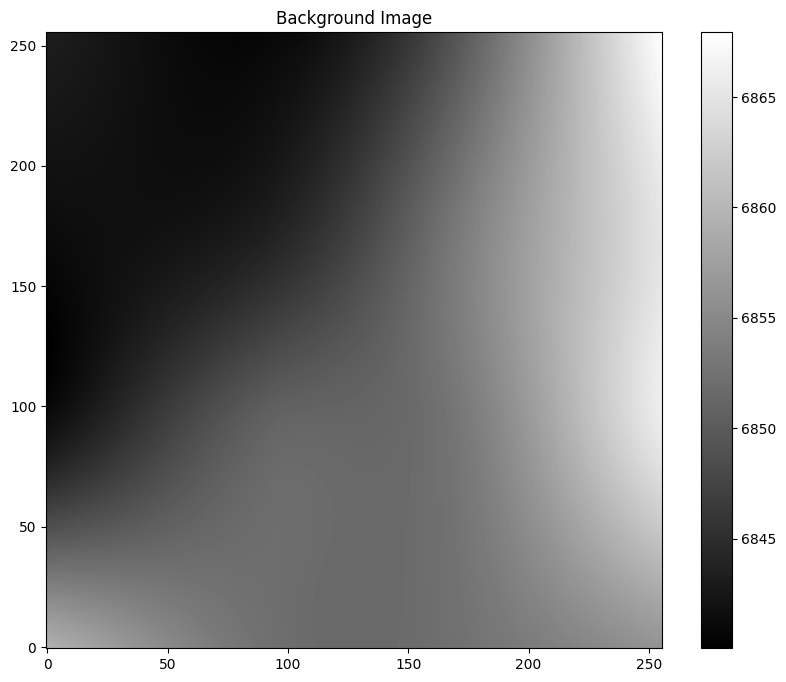

In [5]:
# show bkg color 
bkg_image = bkg.back()
plt.imshow(bkg_image, interpolation ='nearest', cmap='grey', origin = 'lower')
plt.colorbar();
plt.title('Background Image')
plt.savefig('tutorial_image_2.png', dpi=150)
plt.show()

In [6]:
bkg_rms = bkg.rms()

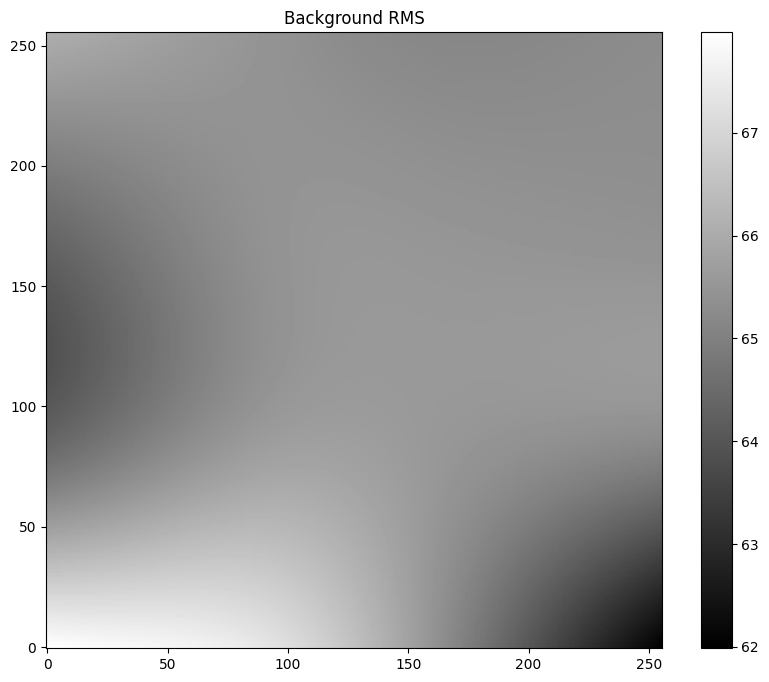

In [7]:
# show bkg rms color
plt.imshow(bkg_rms, interpolation = 'nearest', cmap= 'grey', origin = 'lower')
plt.colorbar();
plt.title('Background RMS')
plt.savefig('tutorial_image_3.png', dpi = 150)
plt.show()

In [8]:
data_sub = data - bkg

In [9]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

In [10]:
# amt of objects identified
len(objects)

69

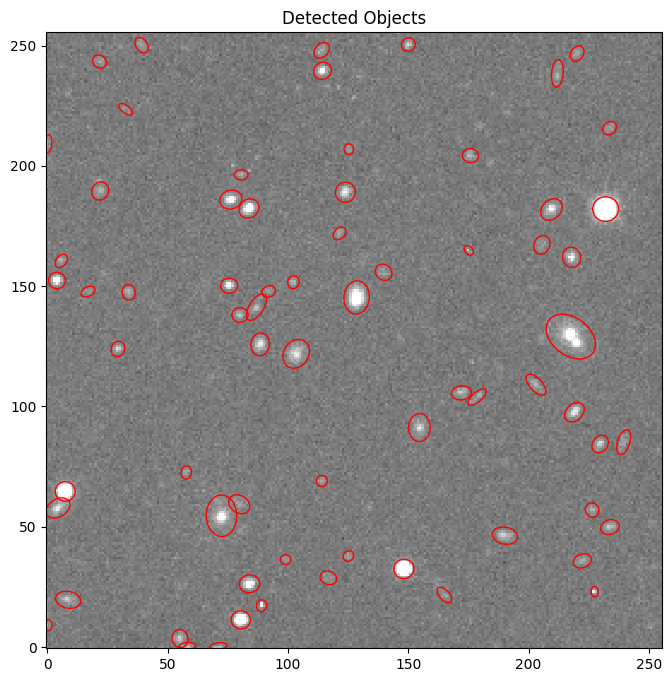

In [11]:
# place img on sub plot
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# locate all objects
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.title('Detected Objects')
plt.savefig('tutorial_image_4', dpi = 150)
plt.show()

In [12]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [13]:
# measures fluxes of all detected objects
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0,err=bkg.globalrms, gain =1.0)

In [14]:
# loop for first 10 objects
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138
